## Technological University Dublin - Tallaght Campus
### Bachelors (Hons) Computing in Machine Learning and AI
### Year 4 Project
#### Project Name: Fraud Detection
#### Name: Dehinde Shogbanmu
#### Student No: X00078774
#### Date: 18-03-2024

In [69]:
# import python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
import joblib
import os, json

from sklearn.decomposition import PCA
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import shapiro, skew

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from IPython.display import clear_output

from kneed import KneeLocator  # Library for detecting the elbow/knee point
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

###### URL for dataset: https://data.mendeley.com/datasets/zrxmphb3c9/1

In [32]:
#Load the dataset to examine its structure and content
filename = 'creditcard.csv'

data = pd.read_csv(filename)

print(data.head())

   Unnamed: 0        V1        V2        V3        V4        V5        V6  \
0      258647  1.725265 -1.337256 -1.012687 -0.361656 -1.431611 -1.098681   
1       69263  0.683254 -1.681875  0.533349 -0.326064 -1.455603  0.101832   
2       96552  1.067973 -0.656667  1.029738  0.253899 -1.172715  0.073232   
3      281898  0.119513  0.729275 -1.678879 -1.551408  3.128914  3.210632   
4       86917  1.271253  0.275694  0.159568  1.003096 -0.128535 -0.608730   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0 -0.842274 -0.026594 -0.032409  ...  0.414524  0.793434  0.028887  0.419421   
1 -0.520590  0.114036 -0.601760  ...  0.116898 -0.304605 -0.125547  0.244848   
2 -0.745771  0.249803  1.383057  ... -0.189315 -0.426743  0.079539  0.129692   
3  0.356276  0.920374 -0.160589  ... -0.335825 -0.906171  0.108350  0.593062   
4  0.088777 -0.145336  0.156047  ...  0.031958  0.123503 -0.174528 -0.147535   

        V25       V26       V27       V28  Amount  Class

In [33]:
# describe attributes
print(data.describe())
print(data.dtypes)

          Unnamed: 0           V1           V2           V3           V4  \
count    5050.000000  5050.000000  5050.000000  5050.000000  5050.000000   
mean   142870.017030    -0.014675     0.044325    -0.035144     0.002494   
std     82574.683531     1.952784     1.558235     1.691458     1.493592   
min         5.000000   -25.266355   -18.701995   -26.823673    -4.575708   
25%     71817.750000    -0.926226    -0.589562    -0.873696    -0.871759   
50%    142544.000000     0.009592     0.088726     0.168377    -0.027034   
75%    215019.000000     1.310062     0.809298     1.017166     0.763626   
max    284782.000000     2.422508    14.323254     3.760965    11.885313   

                V5           V6           V7           V8           V9  ...  \
count  5050.000000  5050.000000  5050.000000  5050.000000  5050.000000  ...   
mean     -0.046625    -0.046340    -0.043020    -0.008398    -0.027331  ...   
std       1.321320     1.254301     1.338170     1.323247     1.134506  ...   

In [34]:
# Display basic information
print("Shape of the dataset:", data.shape)
data.info()

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

Shape of the dataset: (5050, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5050 non-null   int64  
 1   V1          5050 non-null   float64
 2   V2          5050 non-null   float64
 3   V3          5050 non-null   float64
 4   V4          5050 non-null   float64
 5   V5          5050 non-null   float64
 6   V6          5050 non-null   float64
 7   V7          5050 non-null   float64
 8   V8          5050 non-null   float64
 9   V9          5050 non-null   float64
 10  V10         5050 non-null   float64
 11  V11         5050 non-null   float64
 12  V12         5050 non-null   float64
 13  V13         5050 non-null   float64
 14  V14         5050 non-null   float64
 15  V15         5050 non-null   float64
 16  V16         5050 non-null   float64
 17  V17         5050 non-null   float64
 18  V18         5050 non-null   float64

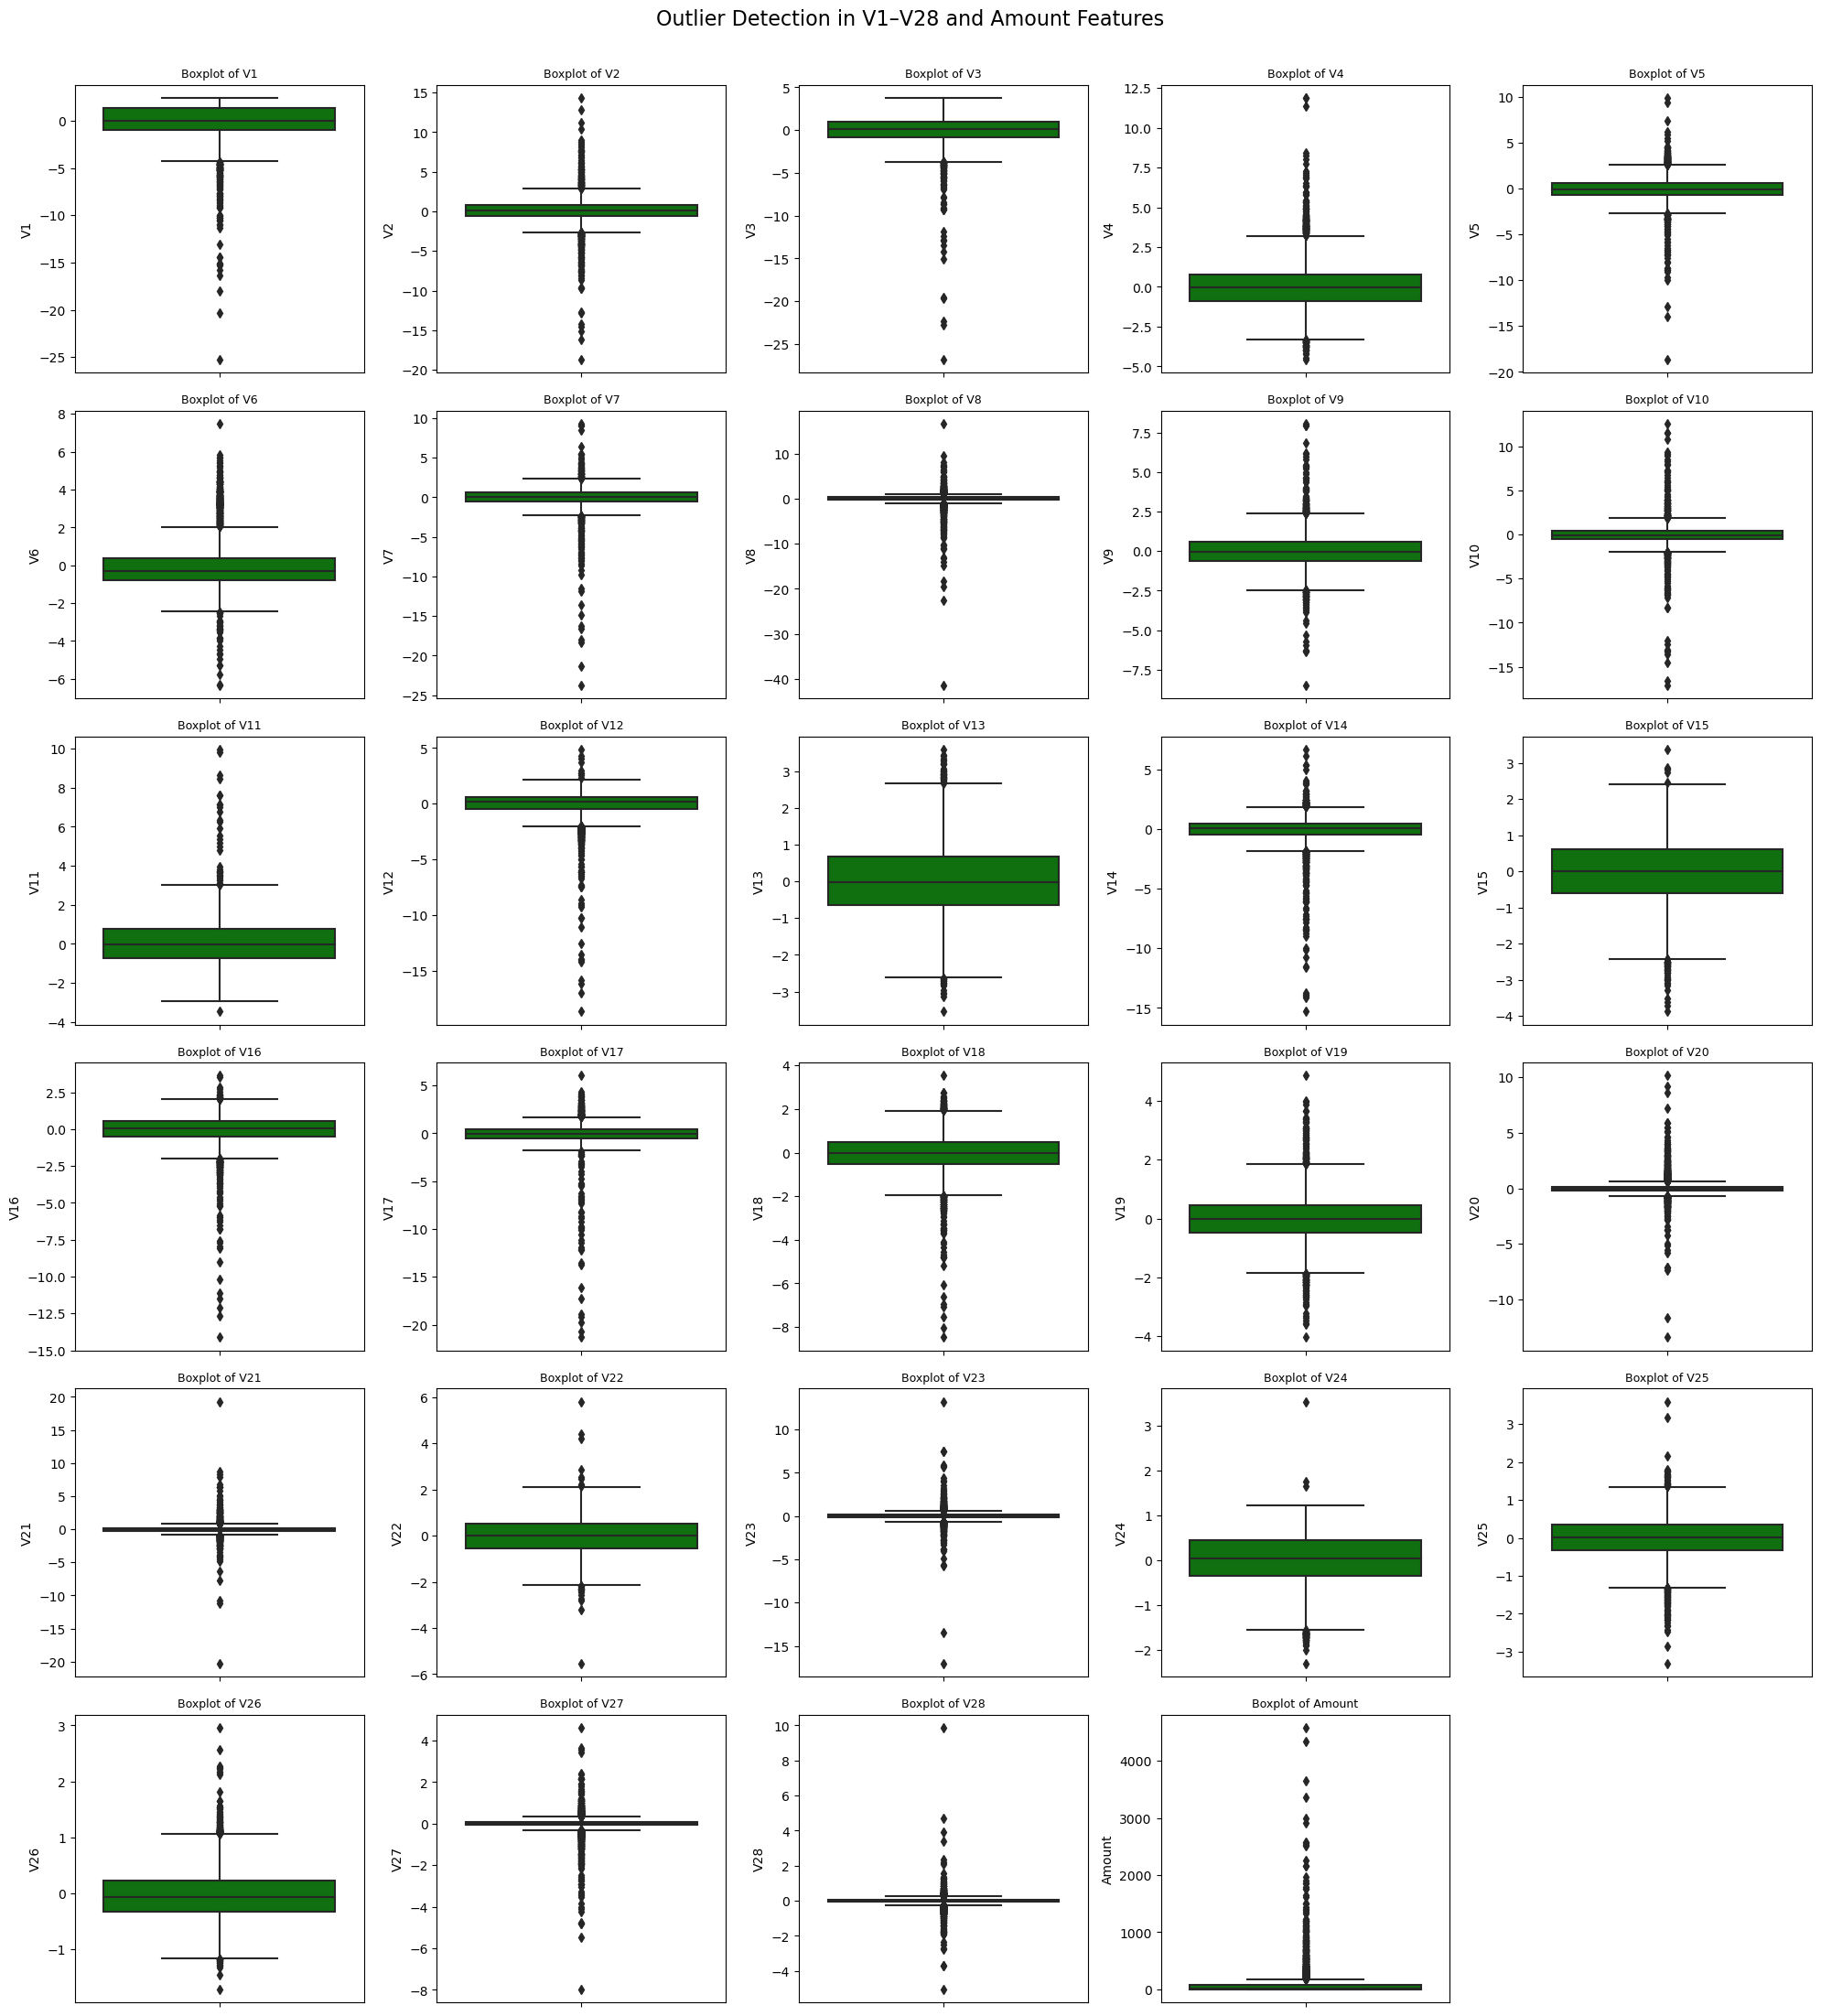

In [35]:
# Select PCA features + Amount for outlier visualization
outlier_cols = [f'V{i}' for i in range(1, 29)] + ['Amount']

# Plot boxplots for all selected features
plt.figure(figsize=(20, 25))
for i, col in enumerate(outlier_cols, 1):
    plt.subplot(7, 5, i)
    sns.boxplot(y=data[col], color='green')
    plt.title(f'Boxplot of {col}', fontsize=9)
    plt.tight_layout()

plt.suptitle('Outlier Detection in V1–V28 and Amount Features', fontsize=16, y=1.02)
plt.show()

<b>Outlier Analysis Findings above indicates:</b>

<ul>
    <li>Each subplot is a boxplot showing the distribution of values for features V1 to V28 and Amount</li>
    <li>The central box in green shows the interquartile range (IQR)</li>
    <li>The horizontal line inside the green box is the median</li>
    <li>The dots outside the whiskers are outliers (values that lie beyond the IQR)</li>

</ul>

<p>The outliers won't be removed in this case because the dataset has alrady been PCA-Reduced, therefore the outliers here are not original values — they are combinations of original features and removing them could distort meaningful variance (and possibly remove fraud signals in the dataset!). Hence removing them risks reducing your model’s ability to detect rare events
In the case of the coulms V1-V28 where the outliers are meaningful, i.e, identifying fraudulent transaction, I'll want to keep them for further analysis
</p>

In [36]:
# Drop the 'Unnamed: 0' column
data = data.drop('Unnamed: 0', axis=1)
print("Columns after dropping 'Unnamed: 0':", data.columns)

Columns after dropping 'Unnamed: 0': Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class'],
      dtype='object')


In [37]:
# Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
print(f"Number of rows before removing duplicates: {len(data)}")

# Remove duplicate rows
data = data.drop_duplicates()
print(f"Number of rows after removing duplicates: {len(data)}")

Number of duplicate rows: 7
Number of rows before removing duplicates: 5050
Number of rows after removing duplicates: 5043


Removing duplicates in the dataset due to the skewness analysis in the model performance. After the removal of this duplicates, the number of rows remaining dataset across all features are 5043

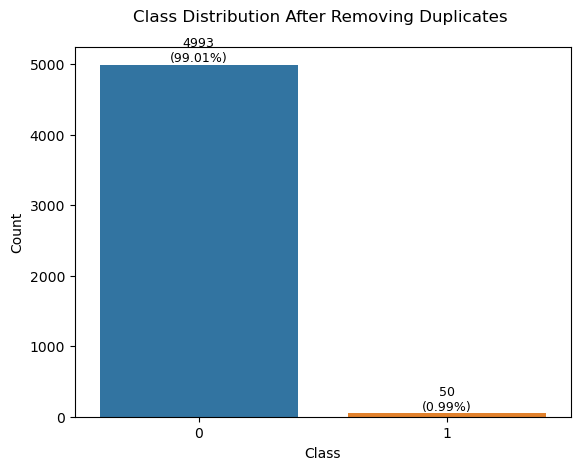

0    4993
1      50
Name: Class, dtype: int64

In [38]:
# Visualize class distribution
class_counts = data['Class'].value_counts()

# Plot
sns.countplot(x='Class', data=data)
plt.title(f'Class Distribution After Removing Duplicates \n')
plt.xlabel('Class')
plt.ylabel('Count')

# Annotate bars with exact values
for i, count in enumerate(class_counts):
    pct = 100 * count / len(data)
    plt.text(i, count, f'{count}\n({pct:.2f}%)', ha='center', va='bottom', fontsize=9)

plt.show()

# Return value counts
class_counts

## Data Pre-Processing

In [39]:
# Checking normality for each feature
for column in data.columns:
    stat, p = shapiro(data[column])
    print(f"Feature: {column}, Shapiro-Wilk p-value: {p}")
    if p > 0.005:
        print("  -> Feature appears to be normally distributed (parametric).")
    else:
        print("  -> Feature does not appear to be normally distributed (non-parametric).")

Feature: V1, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V2, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V3, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V4, Shapiro-Wilk p-value: 9.95585228311693e-38
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V5, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V6, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V7, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V8, Shapiro-Wilk p-value: 0.0
  -> Feature does not appear to be normally distributed (non-parametric).
Feature: V9, Shapiro-Wilk p-value: 2.2483311097291783e-35
  -> Feature does not

C:\Users\Daniel\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


<p>The normality checks carried out above was to know the distribution of the dataset, which will assist with knowing and selecting the best scaling method to use on the features. From the analysis, it appears that all features in the dataset is non-parametric which signifies that it assumes a specific distribution that is more flexible with different data types. It shows that the dataset can handle ordinal, nominal, and even non-normally distributed numerical data, hence proving that the best scaling feature approach to be used will be <b>Standardization</b> instead of <b>Normalization</b> </p>

##### Split the dataset into training and testing sets (e.g., 80-20 split).

In [40]:
# define the target (label) and features (input variables)
X = data.drop(columns='Class', axis=1) #features
y = data['Class'] #target

# split data into 80% trainng and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"The Train dataset records are: {X_train.shape[0]}")
print(f"The Test dataset records are : {X_test.shape[0]}")

The Train dataset records are: 4034
The Test dataset records are : 1009


In [41]:
X_train.to_csv("X_train_creditcard.csv", index=False)
X_test.to_csv("X_test_creditcard.csv", index=False)
y_train.to_csv("y_train_creditcard.csv", index=False)
y_test.to_csv("y_test_creditcard.csv", index=False)

print("Train and test splits has been successfully saved.")

Train and test splits has been successfully saved.


##### Perform skewness check on the training data

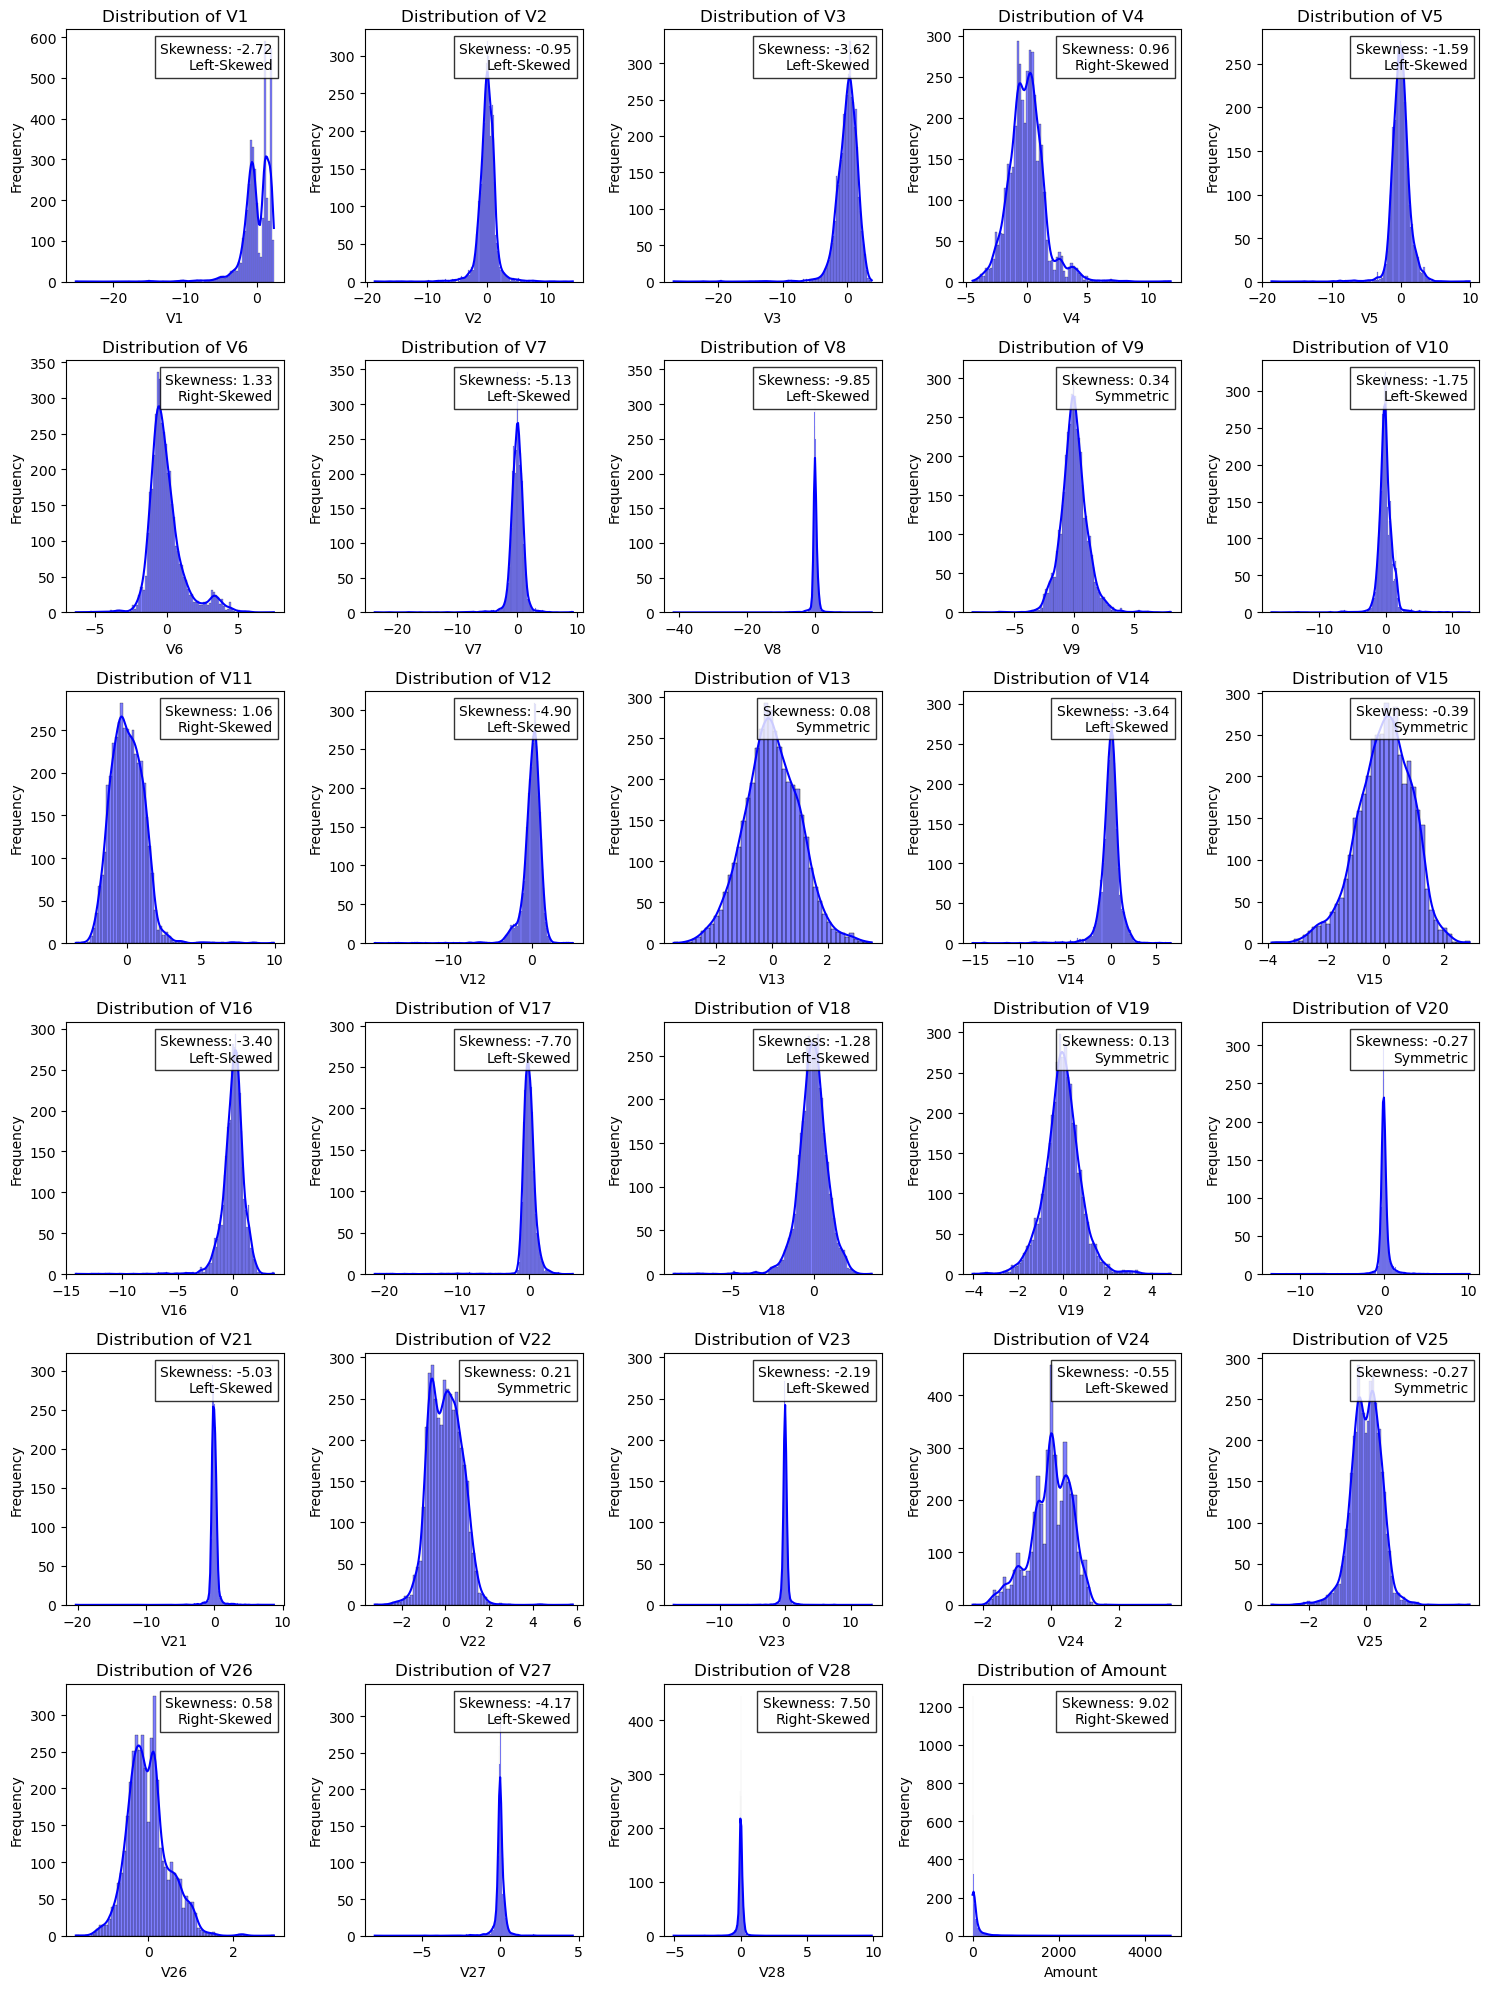

In [42]:
# Load the training dataset before scaling
X_train = pd.read_csv("X_train_creditcard.csv")

# Plot histograms for each feature with skewness interpretation
plt.figure(figsize=(15, 20))
for i, column in enumerate(X_train.columns, 1):
    plt.subplot(6, 5, i)  # Adjust subplot layout based on number of features
    sns.histplot(X_train[column], kde=True, color='blue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Calculate skewness
    feature_skewness = skew(X_train[column])

    # Skewness interpretation
    if feature_skewness > 0.5:
        skewness_label = "Right-Skewed"
    elif feature_skewness < -0.5:
        skewness_label = "Left-Skewed"
    else:
        skewness_label = "Symmetric"

    # Annotate skewness on plot
    plt.text(0.95, 0.95, f'Skewness: {feature_skewness:.2f}\n{skewness_label}', 
             transform=plt.gca().transAxes, fontsize=10, 
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

From the visulaization of the Skewness above, it is evident that the PCA method which was originally used to transform and dimensionally reduce the features in the dataset, hence resulting in majority of skewness in the output/result. No further action will be carried out on the dataset so as not impact the model's detection or prediction of the rare events, i.e. identifying fraudulent and non fraudulent transactions.

##### Feature Scaling using Standardization method

In [43]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data only and transform both
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Save the scaled datasets
X_train_scaled.to_csv("X_train_scaled.csv", index=False)
X_test_scaled.to_csv("X_test_scaled.csv", index=False)

print("Feature scaling has been successfully applied and saved.")

Feature scaling has been successfully applied and saved.


The Standardization appraoch is to center the data around the mean (0) and scales it according to the standard deviation (1) by using the StandardScaler python library. The results of this scaling is to ensure that the dataset is properly prepared for training robust machine learning models.

### Feature Engineering

In the context of the dataset where the features (V1 to V28) are as a result of Principal Component Analysis (PCA), which means they are already uncorrelated with each other. I will procced to analyze their correlation with the target variable (Class) to determine which features are most relevant.

#### For this approach, I will be using demonstrating:
<li>Correlation Attribute Selection</li>
<li>Recursive Feature Elimination with initialization using RandomForestClassifier to inidcate the number of features to select</li>

#### Correlation Attribute Selection

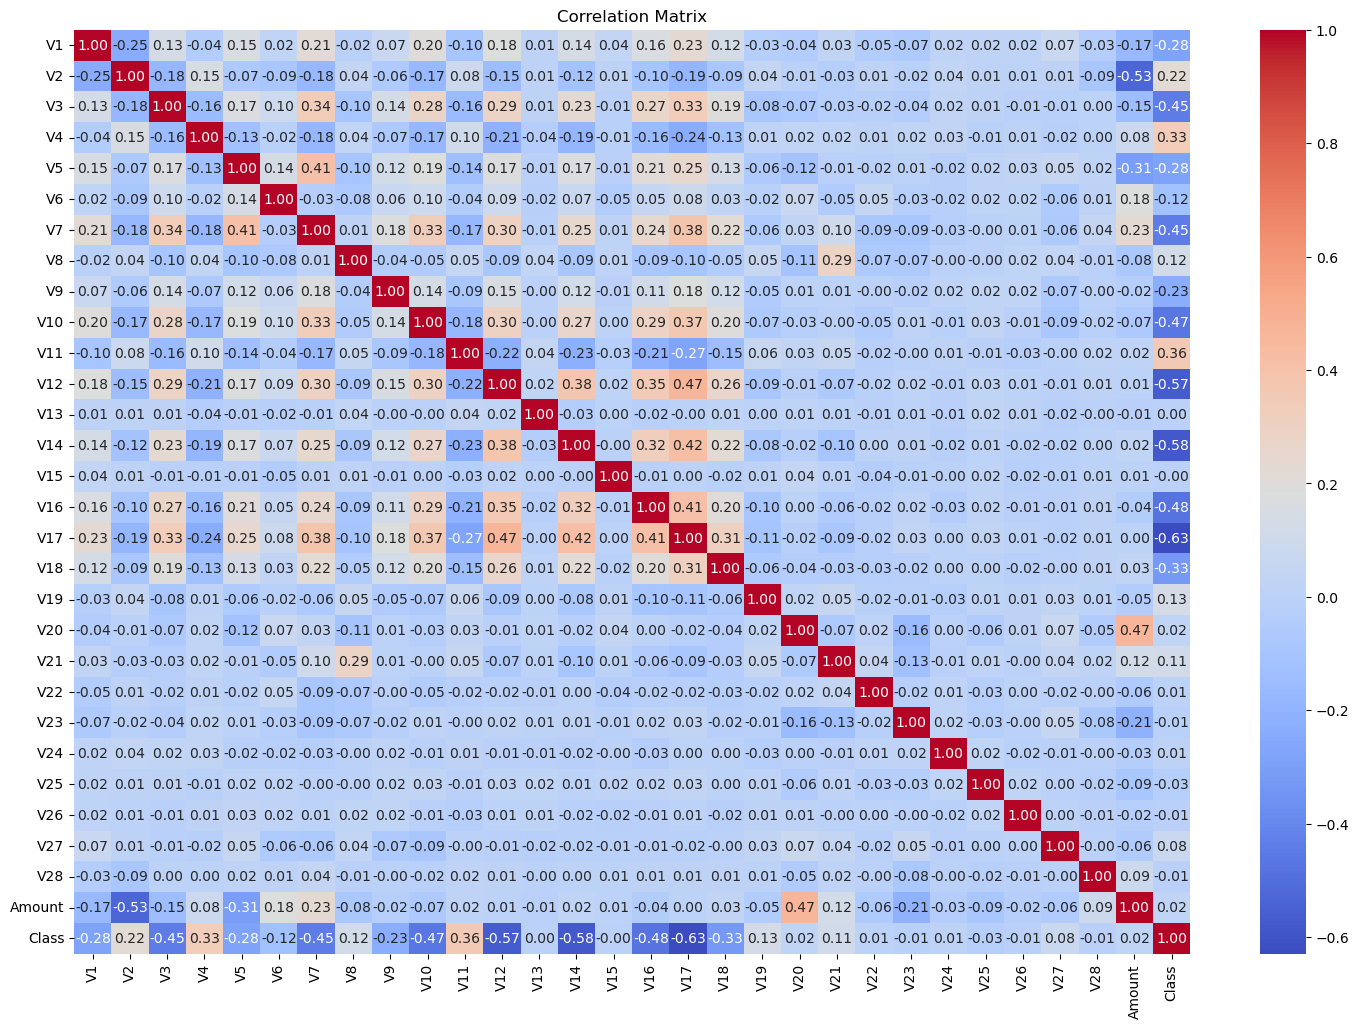

Correlation with Target (Class):
Class     1.000000
V17       0.629348
V14       0.580611
V12       0.566731
V16       0.477234
V10       0.466612
V7        0.448508
V3        0.448269
V11       0.359125
V4        0.333051
V18       0.328970
V1        0.283910
V5        0.280719
V9        0.228646
V2        0.218910
V19       0.132346
V6        0.123617
V8        0.118511
V21       0.110346
V27       0.075520
V25       0.030513
V20       0.024626
Amount    0.024246
V23       0.014058
V28       0.010166
V26       0.009339
V24       0.008942
V22       0.005982
V15       0.001848
V13       0.000094
Name: Class, dtype: float64


In [44]:
# Load the scaled train and target data
X_train_scaled = pd.read_csv("X_train_scaled.csv")
y_train = pd.read_csv("y_train_creditcard.csv")

# Combine features and target for correlation analysis
data = pd.concat([X_train_scaled, y_train], axis=1)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Identify features with high correlation to the target variable
correlation_with_target = correlation_matrix['Class'].abs().sort_values(ascending=False)
print("Correlation with Target (Class):")
print(correlation_with_target)

<p>
The Correlation Attribute Selection technique used above identifies which features  are low/high correlated with the target variable (which in this case, is the Class column which indicates fraudulent or non-fraudulent transactions).From the Correlation Heatmap, the attribute selection with a high absolute correlation values (close to 1) are more relevant to the target variable. Due to this, the features with low correlation to the target will be considered less important and will be removed (not manually) to reduce dimensionality and improve the model performance and evaluation.
</p>

##### Using the Elbow Method to determine how many top attributes should be selected based on diminishing returns in feature importance

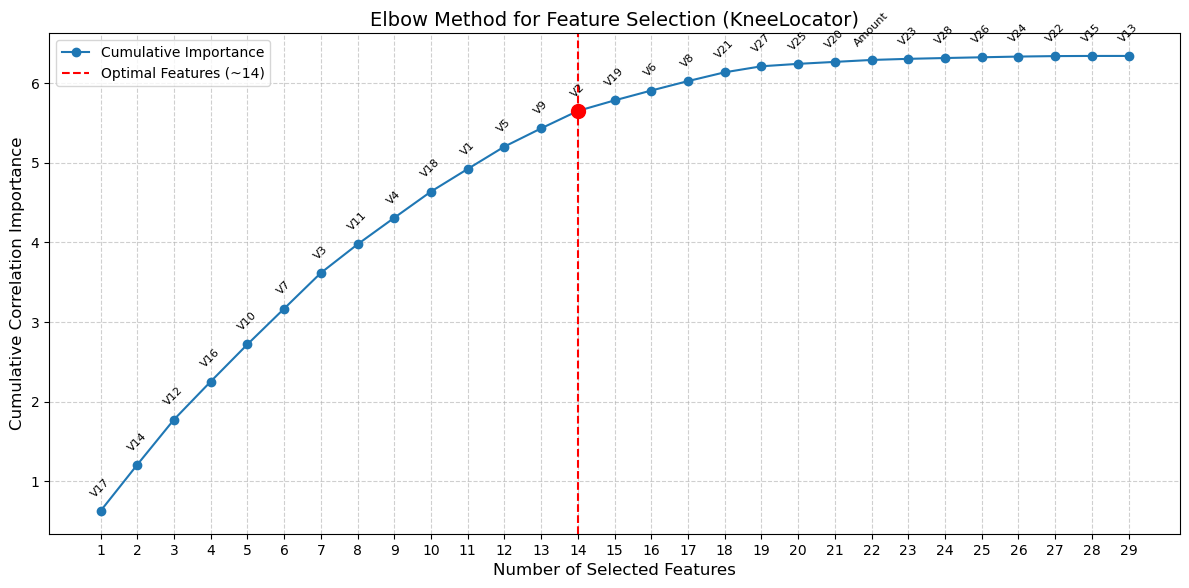

Top Selected Features Based on KneeLocator:
['V17', 'V14', 'V12', 'V16', 'V10', 'V7', 'V3', 'V11', 'V4', 'V18', 'V1', 'V5', 'V9', 'V2']
KneeLocator detected: 14 features
Selected features saved to 'selected_features_corr.csv'


In [45]:
# Load scaled training data and target
X_train_scaled = pd.read_csv("X_train_scaled.csv")
y_train = pd.read_csv("y_train_creditcard.csv")

# Combine for correlation
data = pd.concat([X_train_scaled, y_train], axis=1)

# Calculate correlation matrix
correlation_matrix = data.corr()

# Extract correlation with the target
correlation_with_target = correlation_matrix['Class'].abs().sort_values(ascending=False)
correlation_with_target = correlation_with_target.drop('Class')

# Prepare sorted correlations and feature names
sorted_correlations = correlation_with_target.values
sorted_features = correlation_with_target.index.tolist()

# Calculate cumulative importance
cumulative_importance = np.cumsum(sorted_correlations)

# Use KneeLocator to find optimal number of features
knee_locator = KneeLocator(
    x=range(1, len(sorted_correlations) + 1),
    y=cumulative_importance,
    curve="concave",
    direction="increasing"
)
optimal_knee_features = knee_locator.knee

# Plot Elbow
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(sorted_correlations) + 1), cumulative_importance, marker='o', linestyle='-', label='Cumulative Importance')

# Annotate each point with feature names
for i, feature_name in enumerate(sorted_features):
    plt.annotate(feature_name, (i + 1, cumulative_importance[i]), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontsize=8, rotation=45)

plt.xlabel("Number of Selected Features", fontsize=12)
plt.ylabel("Cumulative Correlation Importance", fontsize=12)
plt.title("Elbow Method for Feature Selection (KneeLocator)", fontsize=14)

# Highlight optimal point
if optimal_knee_features:
    plt.axvline(x=optimal_knee_features, linestyle="--", color="red", label=f"Optimal Features (~{optimal_knee_features})")
    plt.scatter(optimal_knee_features, cumulative_importance[optimal_knee_features - 1], color='red', s=100, zorder=5)

plt.legend(loc='upper left', fontsize=10)
plt.xticks(range(1, len(sorted_correlations) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Select and save top features
selected_features = sorted_features[:optimal_knee_features]
X_corr_selected = X_train_scaled[selected_features].copy()
X_corr_selected.loc[:, 'Class'] = y_train.values

X_corr_selected.to_csv("selected_features_corr.csv", index=False)

print("Top Selected Features Based on KneeLocator:")
print(selected_features)
print(f"KneeLocator detected: {optimal_knee_features} features")
print("Selected features saved to 'selected_features_corr.csv'")

#### Recursive Feature Elimination

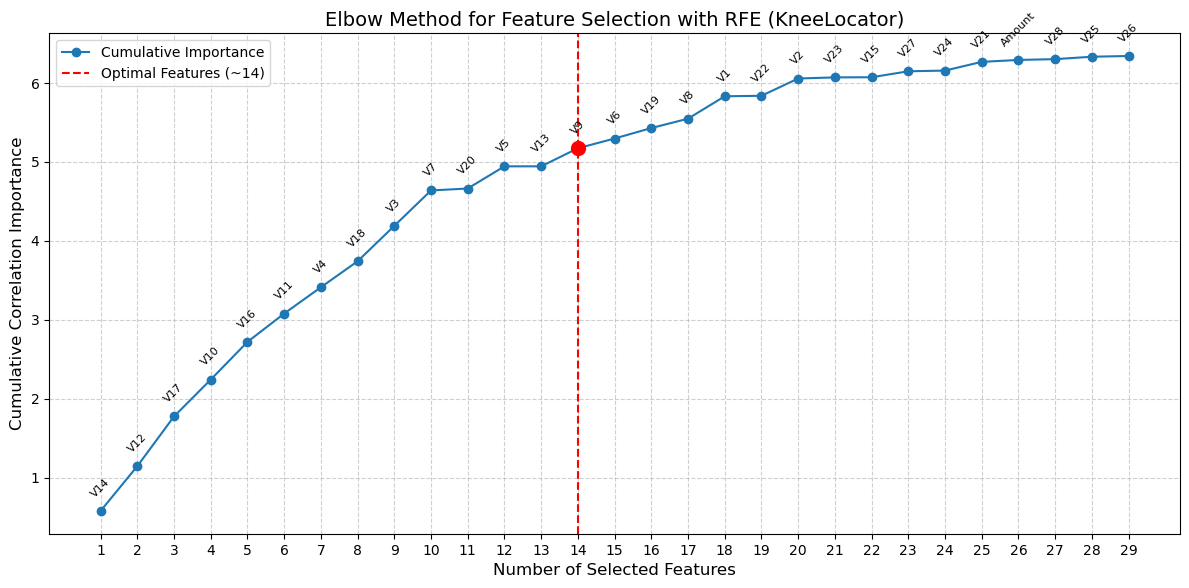

KneeLocator detected: 14 features
Top Selected Features Based on RFE and KneeLocator:
['V14', 'V12', 'V17', 'V10', 'V16', 'V11', 'V4', 'V18', 'V3', 'V7', 'V20', 'V5', 'V13', 'V9']
Selected features saved to 'selected_features_rfe.csv'


In [46]:
# Load the scaled training data
X = pd.read_csv("X_train_scaled.csv")
y = pd.read_csv("y_train_creditcard.csv").values.ravel()  # Flatten target for sklearn

# Initialize Random Forest model for RFE
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=1)
rfe.fit(X, y)

# Get feature rankings
feature_ranking = rfe.ranking_
feature_names = X.columns

# Create DataFrame for rankings
feature_ranking_df = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': feature_ranking
}).sort_values(by='Ranking')

# Correlation-based cumulative importance
X_y_combined = pd.concat([X, pd.read_csv("y_train_creditcard.csv")], axis=1)
correlation_with_target = X_y_combined.corr()['Class'].abs().drop('Class')
sorted_correlations = correlation_with_target[feature_ranking_df['Feature']].values
cumulative_importance = np.cumsum(sorted_correlations)

# Apply KneeLocator to find the optimal number of features
knee_locator = KneeLocator(
    x=range(1, len(cumulative_importance) + 1),
    y=cumulative_importance,
    curve="concave",
    direction="increasing"
)
optimal_knee_features = knee_locator.knee

# Plot Elbow graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(cumulative_importance) + 1), cumulative_importance, marker='o', linestyle='-', label='Cumulative Importance')

# Annotate points with feature names
for i, feature_name in enumerate(feature_ranking_df['Feature']):
    plt.annotate(feature_name, (i + 1, cumulative_importance[i]), textcoords="offset points", xytext=(0,10), 
                 ha='center', fontsize=8, rotation=45)

plt.xlabel("Number of Selected Features", fontsize=12)
plt.ylabel("Cumulative Correlation Importance", fontsize=12)
plt.title("Elbow Method for Feature Selection with RFE (KneeLocator)", fontsize=14)

# Mark elbow point
if optimal_knee_features:
    plt.axvline(x=optimal_knee_features, linestyle="--", color="red", label=f"Optimal Features (~{optimal_knee_features})")
    plt.scatter(optimal_knee_features, cumulative_importance[optimal_knee_features - 1], color='red', s=100, zorder=5)

plt.legend(loc='upper left', fontsize=10)
plt.xticks(range(1, len(cumulative_importance) + 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Select top features and save
top_rfe_features = feature_ranking_df['Feature'][:optimal_knee_features].tolist()
X_rfe_selected = X[top_rfe_features].copy()
X_rfe_selected['Class'] = y

X_rfe_selected.to_csv("selected_features_rfe.csv", index=False)

# Print summary
print(f"KneeLocator detected: {optimal_knee_features} features")
print("Top Selected Features Based on RFE and KneeLocator:")
print(top_rfe_features)
print("Selected features saved to 'selected_features_rfe.csv'")

<span>
The visualzation represeation above indicates the use of the Elbow Method the KneeLocator to automatically detect the elbow point. This will ensure the accurate selection of the optimal number of features without manually estimating the best cutoff. The Elbow Method + KneeLocator automatically selected 14 on both feature engineering approach that best contribute to predicting fraud without adding unnecessary noise. This helps to prevent overfitting, reduce model complexity, and improve training speed.
</span>

##### Dealing with imbalances on the Correleation Feature Selection data

In [47]:
# Load selected correlation features dataset
corr_data = pd.read_csv("selected_features_corr.csv")

# Separate features and target
X_corr = corr_data.drop(columns="Class")
y_corr = corr_data["Class"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_corr_balanced, y_corr_balanced = smote.fit_resample(X_corr, y_corr)

# Save balanced correlation-selected dataset
pd.DataFrame(X_corr_balanced, columns=X_corr.columns).to_csv("X_corr_balanced.csv", index=False)
pd.DataFrame(y_corr_balanced, columns=["Class"]).to_csv("y_corr_balanced.csv", index=False)

print("SMOTE applied to correlation-selected features. Files saved:")
print("- X_corr_balanced.csv")
print("- y_corr_balanced.csv")

SMOTE applied to correlation-selected features. Files saved:
- X_corr_balanced.csv
- y_corr_balanced.csv


##### Dealing with imbalances on the RFE trained data

In [48]:
# Load RFE-selected dataset
rfe_data = pd.read_csv("selected_features_rfe.csv")

# Separate features and target
X_rfe = rfe_data.drop(columns="Class")
y_rfe = rfe_data["Class"]

# Apply SMOTE
smote = SMOTE(random_state=42)
X_rfe_balanced, y_rfe_balanced = smote.fit_resample(X_rfe, y_rfe)

# Save balanced RFE-selected dataset
pd.DataFrame(X_rfe_balanced, columns=X_rfe.columns).to_csv("X_rfe_balanced.csv", index=False)
pd.DataFrame(y_rfe_balanced, columns=["Class"]).to_csv("y_rfe_balanced.csv", index=False)

print("SMOTE applied to RFE-selected features. Files saved:")
print("- X_rfe_balanced.csv")
print("- y_rfe_balanced.csv")

SMOTE applied to RFE-selected features. Files saved:
- X_rfe_balanced.csv
- y_rfe_balanced.csv


##### Dealing with Imbalance Using SMOTE (on Selected Features)
<p>
After selecting the most relevant features via correlation and RFE techniques, the datasets still suffer from class imbalance — where fraudulent transactions (Class = 1) are underrepresented compared to legitimate ones (Class = 0).

To address this, the **SMOTE (Synthetic Minority Over-sampling Technique)** method is applied to the **training datasets** for both feature selection methods:

- It creates synthetic samples of the minority class (`Class = 1`) to balance the dataset.
- This helps prevent the model from being biased toward the majority class and improves the model’s ability to detect fraud effectively.

**Important**: SMOTE is applied **after feature selection** but **before model training**. This ensures that synthetic data is generated only using the final selected features, preserving their integrity and relevance.

**Files Generated:**
- `X_corr_balanced.csv`, `y_corr_balanced.csv` → correlation-attribute-based balanced data
- `X_rfe_balanced.csv`, `y_rfe_balanced.csv` → RFE-based balanced data
</p>

#### Checking to see if there are imbalances in the scaled and balanced dataset for both Correlation Selection and RFE

Class Distribution After SMOTE


<Figure size 800x600 with 0 Axes>

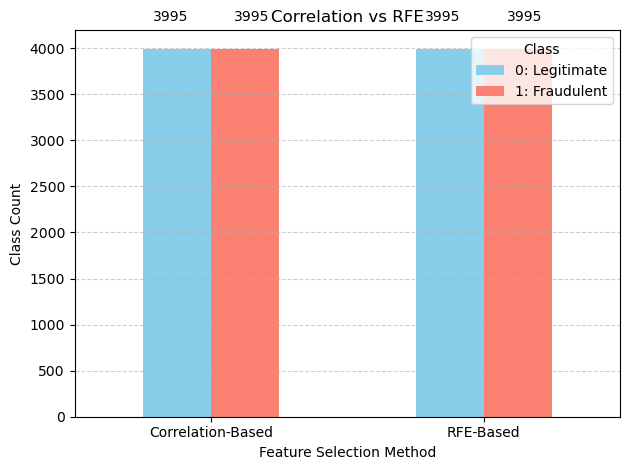

In [49]:
# Load the balanced class labels
y_corr_balanced = pd.read_csv("y_corr_balanced.csv")
y_rfe_balanced = pd.read_csv("y_rfe_balanced.csv")

# Count classes in each dataset
corr_counts = y_corr_balanced['Class'].value_counts().sort_index()
rfe_counts = y_rfe_balanced['Class'].value_counts().sort_index()

# Combine into a single DataFrame for comparison
comparison_df = pd.DataFrame({
    'Correlation-Based': corr_counts,
    'RFE-Based': rfe_counts
}).T  # Transpose to make datasets the rows

# Plot the side-by-side bar chart
plt.figure(figsize=(8, 6))
comparison_df.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])
print(f"Class Distribution After SMOTE")
plt.title("Correlation vs RFE")
plt.xlabel("Feature Selection Method")
plt.ylabel("Class Count")
plt.xticks(rotation=0)
plt.legend(title='Class', labels=['0: Legitimate', '1: Fraudulent'])
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add value labels on top of bars
for i, row in enumerate(comparison_df.values):
    for j, val in enumerate(row):
        plt.text(x=i - 0.15 + 0.3*j, y=val + 300, s=int(val), ha='center', fontsize=10)

plt.tight_layout()
plt.show()

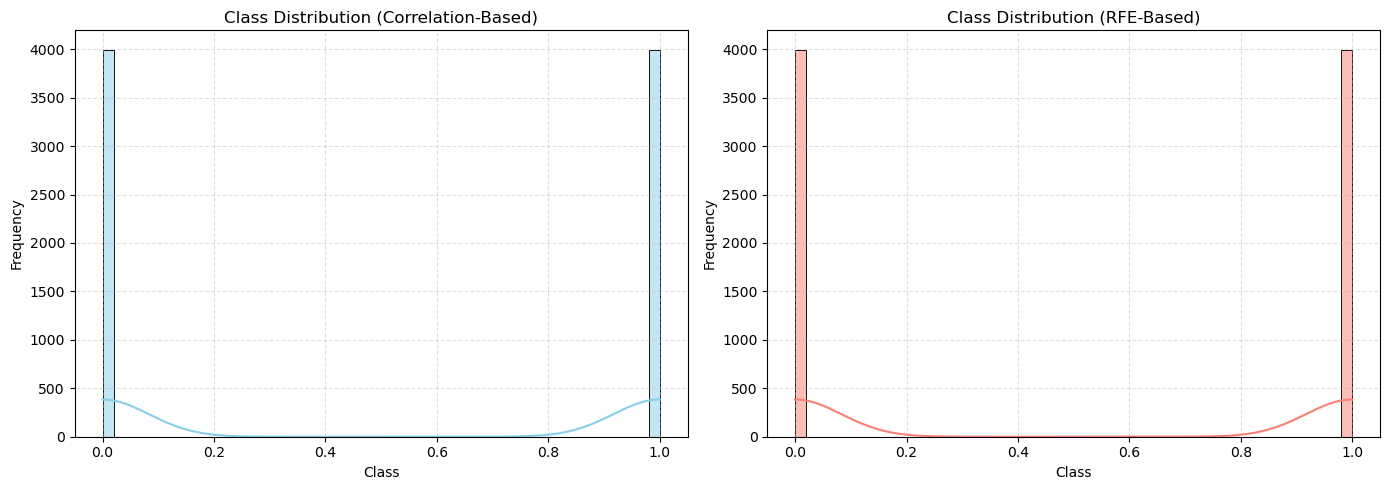

In [50]:
# Load balanced class labels
y_corr_balanced = pd.read_csv("y_corr_balanced.csv")
y_rfe_balanced = pd.read_csv("y_rfe_balanced.csv")

# Setup subplot layout
plt.figure(figsize=(14, 5))

# Plot for Correlation-Based Dataset
plt.subplot(1, 2, 1)
sns.histplot(y_corr_balanced['Class'], kde=True, bins=50, color='skyblue')
plt.title("Class Distribution (Correlation-Based)")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.4)

# Plot for RFE-Based Dataset
plt.subplot(1, 2, 2)
sns.histplot(y_rfe_balanced['Class'], kde=True, bins=50, color='salmon')
plt.title("Class Distribution (RFE-Based)")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

<p>
Two identical bars for Class 0 and Class 1 Histogram with two large spikes at 0.0 and 1.0, shows the perfectly balanced dataset which confirms that the Class imbalances has been resolved with SMOTE on both correlation-selected features and Recursive Feature Elimination RFE
</p>

## Model Performance for Balanced Correlation Feature Selection

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


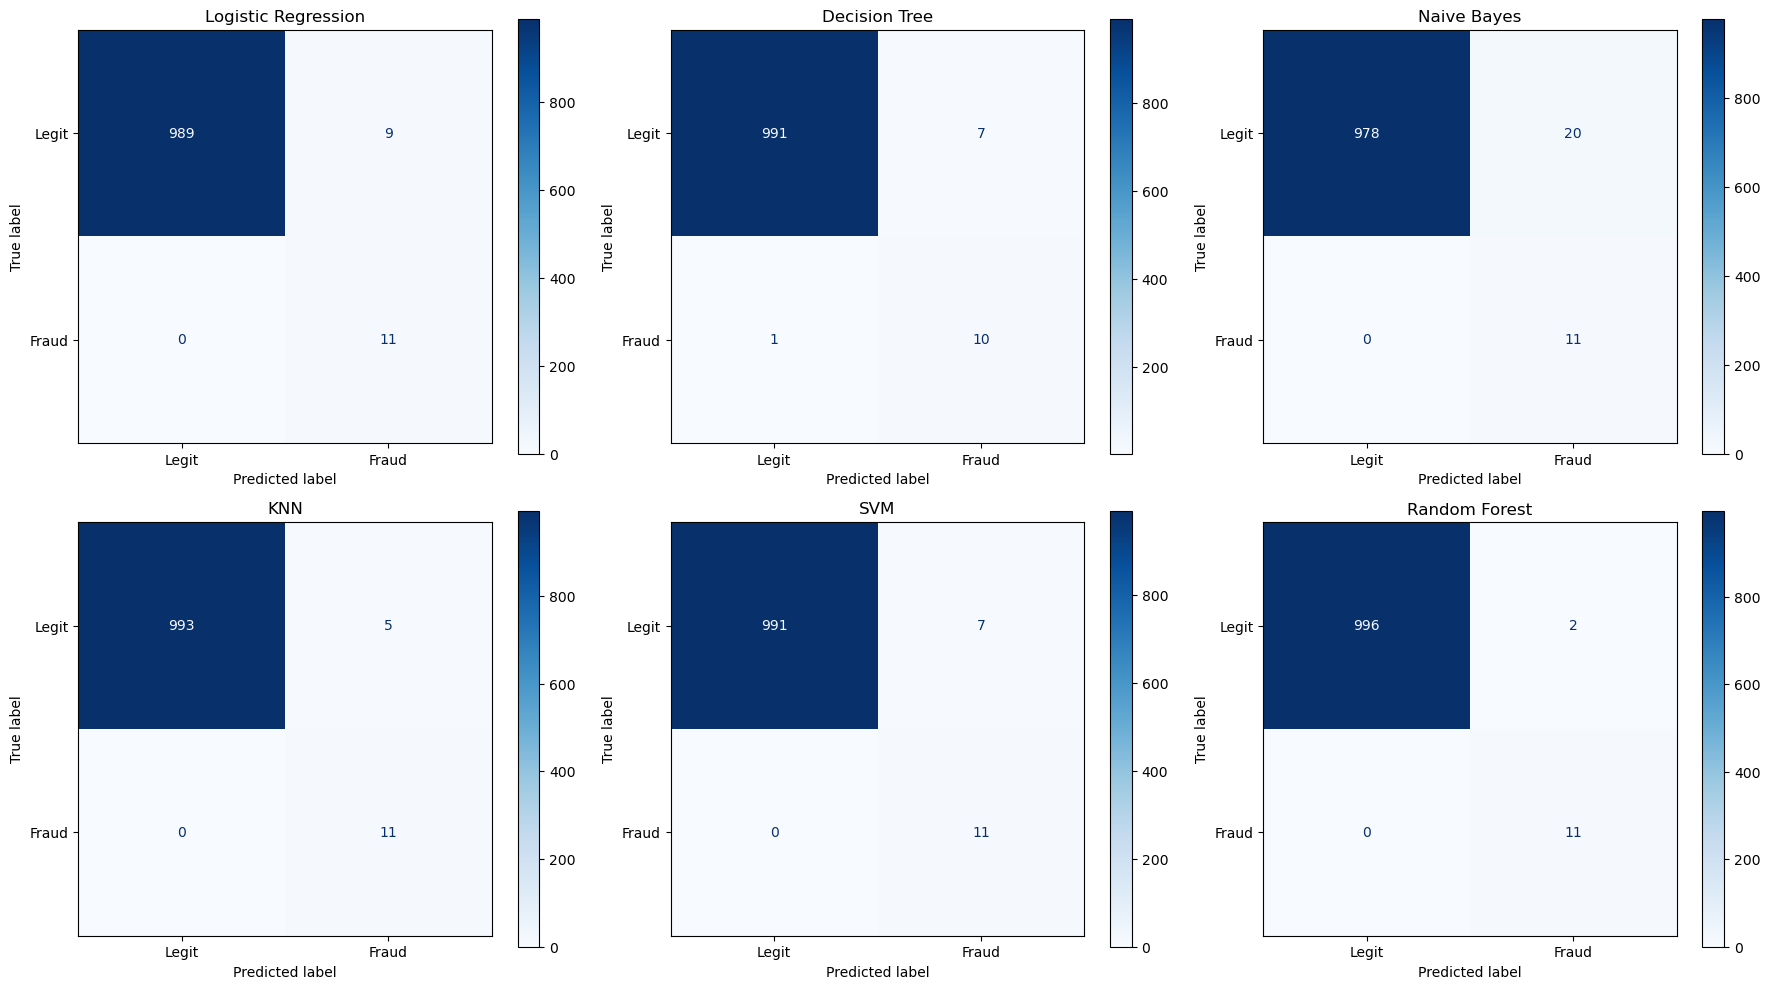

In [54]:
# Load test and training data
X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test_creditcard.csv").values.ravel()
X_train = pd.read_csv("X_corr_balanced.csv")
y_train = pd.read_csv("y_corr_balanced.csv").values.ravel()

# Select matching features
selected_columns = [col for col in X_train.columns if col != "Class"]
X_test = X_test[selected_columns]

# Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Set up plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Make sure output folder exists
os.makedirs('model_output', exist_ok=True)

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train[selected_columns], y_train)
    y_pred = model.predict(X_test)

    # Save each model with a distinct name
    model_filename = f"model_output/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, model_filename)

    # Plot
    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=["Legit", "Fraud"], ax=axes[idx], cmap='Blues'
    )
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()

In [55]:
# Load test data
X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test_creditcard.csv").values.ravel()

# Load correlation-based training data
X_corr = pd.read_csv("X_corr_balanced.csv")
y_corr = pd.read_csv("y_corr_balanced.csv").values.ravel()
selected_columns = [col for col in X_corr.columns if col != "Class"]
X_corr = X_corr[selected_columns]
X_test_corr = X_test[selected_columns]

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Print summary evaluations
for name, model in models.items():
    model.fit(X_corr, y_corr)
    y_pred = model.predict(X_test_corr)

    print(f"\n{name} - Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Legitimate (0)", "Fraudulent (1)"]))

    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("\nConfusion Matrix:")
    print(f"True Negatives  (TN): {tn}  → Legit predicted as Legit")
    print(f"False Positives (FP): {fp}  → Legit predicted as Fraud")
    print(f"False Negatives (FN): {fn}  → Fraud missed")
    print(f"True Positives  (TP): {tp}  → Fraud correctly predicted")


Logistic Regression - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      1.00       998
Fraudulent (1)       0.55      1.00      0.71        11

      accuracy                           0.99      1009
     macro avg       0.78      1.00      0.85      1009
  weighted avg       1.00      0.99      0.99      1009

ROC-AUC Score: 0.9955

Confusion Matrix:
True Negatives  (TN): 989  → Legit predicted as Legit
False Positives (FP): 9  → Legit predicted as Fraud
False Negatives (FN): 0  → Fraud missed
True Positives  (TP): 11  → Fraud correctly predicted

Decision Tree - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      1.00       998
Fraudulent (1)       0.59      0.91      0.71        11

      accuracy                           0.99      1009
     macro avg       0.79      0.95      0.86      1009
  weighted avg       0.99      0.99      0.99     

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



SVM - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      1.00       998
Fraudulent (1)       0.61      1.00      0.76        11

      accuracy                           0.99      1009
     macro avg       0.81      1.00      0.88      1009
  weighted avg       1.00      0.99      0.99      1009

ROC-AUC Score: 0.9965

Confusion Matrix:
True Negatives  (TN): 991  → Legit predicted as Legit
False Positives (FP): 7  → Legit predicted as Fraud
False Negatives (FN): 0  → Fraud missed
True Positives  (TP): 11  → Fraud correctly predicted

Random Forest - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00       998
Fraudulent (1)       0.85      1.00      0.92        11

      accuracy                           1.00      1009
     macro avg       0.92      1.00      0.96      1009
  weighted avg       1.00      1.00      1.00      1009

ROC-AUC S

## Model Evaluation for Balanced Correlation Attribute Selection

<p>
    <ul>
        <li>
            <h3>Logistic Regression Model</h3>
            <p>The Model was able to achieve a 0.99 accuracy score for both classes, i.e,(1=Fraudulent, 0=Non-Fraudulent) indicates a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9955 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.55 for Class 1(Fraudulent transactions) proves that about 45% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 989 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts 9 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that no fraudulent transaction was missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>

</p>


<p>
    <ul>
        <li>
            <h3>Decision Tree Model</h3>
            <p>The Model was able to achieve a 0.99 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9510 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.59 for Class 1(Fraudulent transactions) proves that about 41% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 991 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts 7 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 1 amount of fraudulent transactions. Which implies that a fraudulent transaction was missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 10 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>


<p>
    <ul>
        <li>
            <h3>Naive Bayes Model</h3>
            <p>The Model was able to achieve a 0.98 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9900 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.35 for Class 1(Fraudulent transactions) proves that about 65% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 978 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 20 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that a fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>



<p>
    <ul>
        <li>
            <h3>K-Nearest Neighbors (KNN) Model</h3>
            <p>The Model was able to achieve a 1.00 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9975 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.69 for Class 1(Fraudulent transactions) proves that about 31% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 993 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 5 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that a fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>



<p>
    <ul>
        <li>
            <h3>Support Vector Machine (SVM) Model</h3>
            <p>The Model was able to achieve a 0.99 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9965 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.61 for Class 1(Fraudulent transactions) proves that about 31% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 991 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 7 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that a fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>



<p>
    <ul>
        <li>
            <h3>Random Forest Model</h3>
            <p>The Model was able to achieve a 1.00 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9990 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.85 for Class 1(Fraudulent transactions) proves that about 15% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 996 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 2 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that a fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>

## Model Performance for Balanced Recursive Feature Elimination(RFE)

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


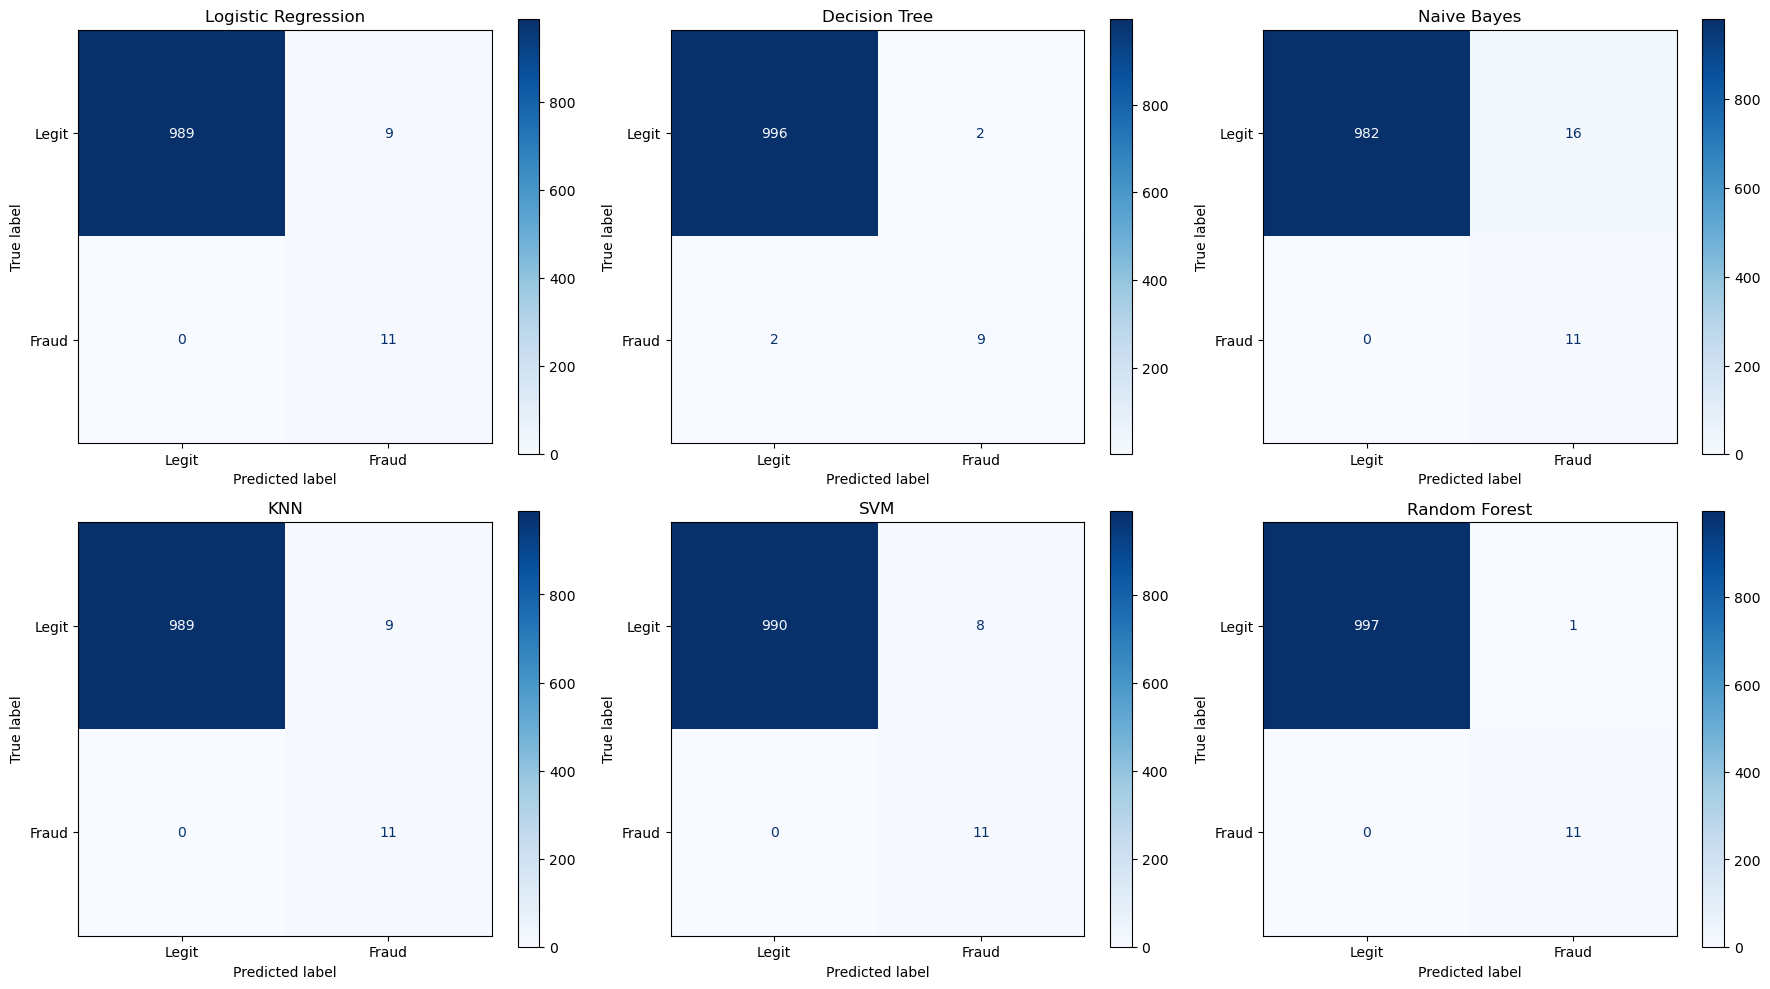

In [56]:
# Load test and training data
X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test_creditcard.csv").values.ravel()
X_train = pd.read_csv("X_rfe_balanced.csv")
y_train = pd.read_csv("y_rfe_balanced.csv").values.ravel()

# Select matching features
selected_columns = [col for col in X_train.columns if col != "Class"]
X_test = X_test[selected_columns]

# Define all models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(n_neighbors=10),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Set up plotting
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# Make sure output folder exists
os.makedirs('model_output', exist_ok=True)

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train[selected_columns], y_train)
    y_pred = model.predict(X_test)

    # Save each model with a distinct name
    model_filename = f"model_output/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, model_filename)

    # Plot
    cm_display = ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, display_labels=["Legit", "Fraud"], ax=axes[idx], cmap='Blues'
    )
    axes[idx].set_title(name)

plt.tight_layout()
plt.show()

In [57]:
# Load test data
X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test_creditcard.csv").values.ravel()

# Load correlation-based training data
X_corr = pd.read_csv("X_rfe_balanced.csv")
y_corr = pd.read_csv("y_rfe_balanced.csv").values.ravel()
selected_columns = [col for col in X_corr.columns if col != "Class"]
X_corr = X_corr[selected_columns]
X_test_corr = X_test[selected_columns]

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Naive Bayes": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Print summary evaluations
for name, model in models.items():
    model.fit(X_corr, y_corr)
    y_pred = model.predict(X_test_corr)

    print(f"\n{name} - Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Legitimate (0)", "Fraudulent (1)"]))

    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC-AUC Score: {roc_auc:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print("\nConfusion Matrix:")
    print(f"True Negatives  (TN): {tn}  → Legit predicted as Legit")
    print(f"False Positives (FP): {fp}  → Legit predicted as Fraud")
    print(f"False Negatives (FN): {fn}  → Fraud missed")
    print(f"True Positives  (TP): {tp}  → Fraud correctly predicted")


Logistic Regression - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      1.00       998
Fraudulent (1)       0.55      1.00      0.71        11

      accuracy                           0.99      1009
     macro avg       0.78      1.00      0.85      1009
  weighted avg       1.00      0.99      0.99      1009

ROC-AUC Score: 0.9955

Confusion Matrix:
True Negatives  (TN): 989  → Legit predicted as Legit
False Positives (FP): 9  → Legit predicted as Fraud
False Negatives (FN): 0  → Fraud missed
True Positives  (TP): 11  → Fraud correctly predicted

Decision Tree - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      1.00      1.00       998
Fraudulent (1)       0.82      0.82      0.82        11

      accuracy                           1.00      1009
     macro avg       0.91      0.91      0.91      1009
  weighted avg       1.00      1.00      1.00     

C:\Users\Daniel\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)



KNN - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      1.00       998
Fraudulent (1)       0.61      1.00      0.76        11

      accuracy                           0.99      1009
     macro avg       0.81      1.00      0.88      1009
  weighted avg       1.00      0.99      0.99      1009

ROC-AUC Score: 0.9965

Confusion Matrix:
True Negatives  (TN): 991  → Legit predicted as Legit
False Positives (FP): 7  → Legit predicted as Fraud
False Negatives (FN): 0  → Fraud missed
True Positives  (TP): 11  → Fraud correctly predicted

SVM - Classification Report:

                precision    recall  f1-score   support

Legitimate (0)       1.00      0.99      1.00       998
Fraudulent (1)       0.58      1.00      0.73        11

      accuracy                           0.99      1009
     macro avg       0.79      1.00      0.86      1009
  weighted avg       1.00      0.99      0.99      1009

ROC-AUC Score: 0.99

## Model Evaluation for Recursive Feature Elimination (RFE)

<p>
    <ul>
        <li>
            <h3>Logistic Regression Model</h3>
            <p>The Model was able to achieve a 0.99 accuracy score for both classes, i.e,(1=Fraudulent, 0=Non-Fraudulent) indicates a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9955 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.55 for Class 1(Fraudulent transactions) proves that about 45% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 989 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts 9 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that no fraudulent transaction was missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>

</p>


<p>
    <ul>
        <li>
            <h3>Decision Tree Model</h3>
            <p>The Model was able to achieve a 1.00 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9081 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.82 for Class 1(Fraudulent transactions) proves that about 18% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 996 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts 2 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 2 amount of fraudulent transactions. Which implies the amount of fraudulent transactions that were missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 9 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>


<p>
    <ul>
        <li>
            <h3>Naive Bayes Model</h3>
            <p>The Model was able to achieve a 0.98 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9920 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.41 for Class 1(Fraudulent transactions) proves that about 59% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 982 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 16 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that no fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>



<p>
    <ul>
        <li>
            <h3>K-Nearest Neighbors (KNN) Model</h3>
            <p>The Model was able to achieve a 0.99 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9965 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.61 for Class 1(Fraudulent transactions) proves that about 39% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 991 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 7 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that no fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>



<p>
    <ul>
        <li>
            <h3>Support Vector Machine (SVM) Model</h3>
            <p>The Model was able to achieve a 0.99 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a near-perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9960 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.58 for Class 1(Fraudulent transactions) proves that about 42% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 990 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 8 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that a fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>



<p>
    <ul>
        <li>
            <h3>Random Forest Model</h3>
            <p>The Model was able to achieve a 1.00 accuracy score for both classes, i.e.,(1=Fraudulent, 0=Non-Fraudulent), indicating a perfect classification.
            </p>
            <p>The ROC-AUC Score of 0.9995 proves to be high, indicating that the model can distinguish between fraud and non-fraudulent transactions with a near-perfect precision.
            </p>
            <p>Precision Score of 0.92 for Class 1(Fraudulent transactions) proves that about 8% of fraud predictions were wrong.
            </p>
            <p>
            <span><b>Analysing the Confusion Matrix Result:</b></span>
            <ul>
                <li>A <b>True Negatives</b> indicates the model was able to predict 997 amount of legitimate transactions correctly</li>
                <li>A <b>False Positives</b> indicates that the model predicts about 1 amount of legitimate transactions as fraudulent.</li>
                <li>A <b>False Negatives</b> indicates that the model predicts 0 amount of fraudulent transactions. Which implies that no fraudulent transaction was not missed in the prediction</li>
                <li>A <b>True Positives</b> indicates that the model predicts 11 fraudulent transactions correctly</li>
            </ul>
        </li>
    </ul>
</p>

## Builing a Neural Network Model with Forward Pass and Backpropagation to evaluate model predictions


Training Neural Network on Correlation-Selected Features (Classification)



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
Epoch 10/500 - Loss: 0.403379
Epoch 20/500 - Loss: 0.299874
Epoch 30/500 - Loss: 0.210506
Epoch 40/500 - Loss: 0.131943
Epoch 50/500 - Loss: 0.078575
Epoch 60/500 - Loss: 0.050695
Epoch 70/500 - Loss: 0.036649
Epoch 80/500 - Loss: 0.028685
Epoch 90/500 - Loss: 0.023514
Epoch 100/500 - Loss: 0.019702
Epoch 110/500 - Loss: 0.016892
Epoch 120/500 - Loss: 0.014743
Epoch 130/500 - Loss: 0.013033
Epoch 140/500 - Loss: 0.011695
Epoch 150/500 - Loss: 0.010618
Epoch 160/500 - Loss: 0.009717
Epoch 170/500 - Loss: 0.008952
Epoch 180/500 - Loss: 0.008286
Epoch 190/500 - Loss: 0.007712
Epoch 200/500 - Loss: 0.007201
Epoch 210/500 - Loss: 0.006745
Epoch 220/500 - Loss: 0.006340
Epoch 230/500 - Loss: 0.005972
Epoch 240/500 - Loss: 0.005638
Epoch 250/500 - Loss: 0.005336
Epoch 260/500 - Loss: 0.005066
Epoch 270/500 - Loss: 0.004823
Epoch 280/500 - Loss: 0.004607
Epoch 290/500 - Loss: 0.004408
Epoch 300/500 - Loss: 0.004229
Epoch 310/500 - Loss: 0.004065
Epoch 320

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,585 (14.00 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Epoch 10/500 - Loss: 0.397090
Epoch 20/500 - Loss: 0.304818
Epoch 30/500 - Loss: 0.229667
Epoch 40/500 - Loss: 0.161711
Epoch 50/500 - Loss: 0.106511
Epoch 60/500 - Loss: 0.069230
Epoch 70/500 - Loss: 0.048716
Epoch 80/500 - Loss: 0.037089
Epoch 90/500 - Loss: 0.029887
Epoch 100/500 - Loss: 0.025053
Epoch 110/500 - Loss: 0.021457
Epoch 120/500 - Loss: 0.018682
Epoch 130/500 - Loss: 0.016478
Epoch 140/500 - Loss: 0.014696
Epoch 150/500 - Loss: 0.013228
Epoch 160/500 - Loss: 0.012010
Epoch 170/500 - Loss: 0.010974
Epoch 180/500 - Loss: 0.010083
Epoch 190/500 - Loss: 0.009296
Epoch 200/500 - Loss: 0.008605
Epoch 210/500 - Loss: 0.008005
Epoch 220/500 - Loss: 0.007474
Epoch 230/500 - Loss: 0.006992
Epoch 240/500 - Loss: 0.006559
Epoch 250/500 - Loss: 0.006172
Epoch 260/500 - Loss: 0.005820
Epoch 270/500 - Loss: 0.005497
Epoch 280/500 - Loss: 0.005202
Epoch 290/500 - Loss: 0.004924
Epoch 300/500 - Loss: 0.004669
Epoch 310/500 - Loss: 0.004441
Epoch 320/

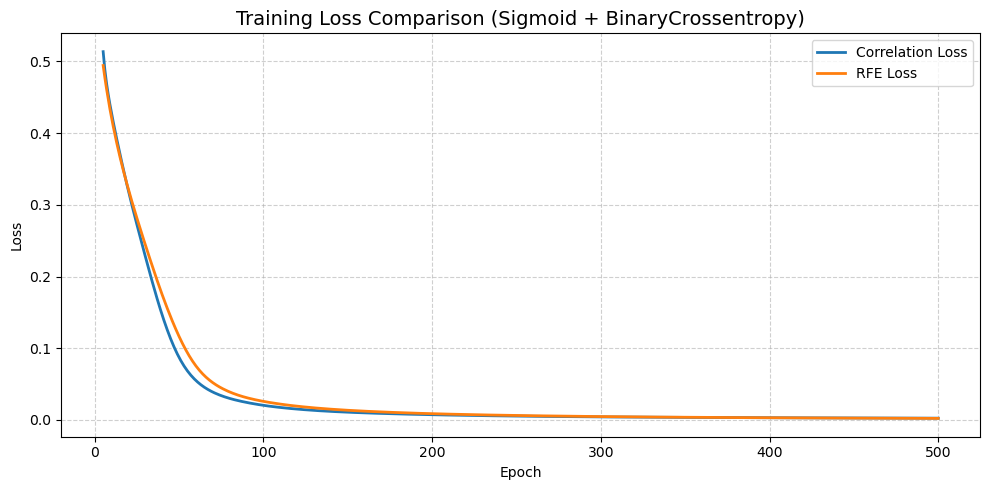

In [58]:
# Load test set
X_test = pd.read_csv("X_test_scaled.csv")
y_test = pd.read_csv("y_test_creditcard.csv").values.ravel()

# Feature set mappings
feature_sets = {
    "Correlation": {
        "X": "X_corr_balanced.csv",
        "y": "y_corr_balanced.csv"
    },
    "RFE": {
        "X": "X_rfe_balanced.csv",
        "y": "y_rfe_balanced.csv"
    }
}

# Store losses
loss_curves = {}

# Train on each feature set
for label, paths in feature_sets.items():
    print(f"\nTraining Neural Network on {label}-Selected Features (Classification)\n")

    # Load and preprocess
    X_train_df = pd.read_csv(paths["X"])
    y_train_df = pd.read_csv(paths["y"])
    selected_columns = [col for col in X_train_df.columns if col != "Class"]

    X_train_df = X_train_df[selected_columns]
    X_test_subset = X_test[selected_columns]

    # Convert to tensors
    X_train = tf.convert_to_tensor(X_train_df.values, dtype=tf.float32)
    y_train = tf.convert_to_tensor(y_train_df.values, dtype=tf.float32)

    # Define classification model (with sigmoid output)
    model = Sequential([
        Input(shape=(X_train.shape[1],)), # Input layer
        Dense(64, activation="relu"),     # Hidden layer with 64 neurons
        Dense(32, activation="relu"),     # Hidden layer with 32 neurons
        Dense(16, activation="relu"),     # Hidden layer with 16 neurons
        Dense(1, activation="sigmoid")    # Output layer with 1 neuron and sigmoid activation
    ])

    # Compile for summary display
    model.compile(optimizer="adam", loss="binary_crossentropy")
    model.summary()

    # Dummy forward pass
    dummy_input = np.expand_dims(X_test_subset.iloc[0].values, axis=0)
    model.predict(dummy_input)

    # Define binary cross-entropy loss & optimizer
    loss_fn = tf.keras.losses.BinaryCrossentropy()
    optimizer = tf.keras.optimizers.Adam()

    # Manual training loop
    epochs = 500
    losses = []

    for epoch in range(epochs):
        with tf.GradientTape() as tape:
            y_pred = model(X_train, training=True)
            loss = loss_fn(y_train, y_pred)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        losses.append(loss.numpy())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs} - Loss: {loss.numpy():.6f}")

    # Save loss for visualization
    loss_curves[label] = losses

    # Evaluate on test data
    y_pred_probs = model.predict(X_test_subset)
    y_pred = (y_pred_probs > 0.5).astype("int32")

    print(f"\n{label} - Classification Report:")
    print(classification_report(y_test, y_pred, target_names=["Legitimate (0)", "Fraudulent (1)"]))

    print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred):.4f}")

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    print(f"\nConfusion Matrix:")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

# Plot training loss curves
plt.figure(figsize=(10, 5))
for label, losses in loss_curves.items():
    smooth = pd.Series(losses).rolling(window=5).mean()
    plt.plot(range(1, len(smooth)+1), smooth, label=f"{label} Loss", linewidth=2)

plt.title("Training Loss Comparison (Sigmoid + BinaryCrossentropy)", fontsize=14)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

<p>From the above, I've created a neural network model using Keras' Sequential model library , where the layers are stacked one after another.
<ul>
<li>The Input layer was used to define the shape of the input, i.e. number of features taken as input.</li>
<li>Next are Dense layers, which compromises of RELU and Sigmoid.</li>
<ul>
<li>First was hidden ReLU (Rectified Linear Unit) layer declared with 64 nuerons hidden ReLU layer. 
</li>
<li>Second was also a hidden ReLU (Rectified Linear Unit) layer declared with 32 nuerons hidden ReLU layer. 
</li>
<li>Second was also a hidden ReLU (Rectified Linear Unit) layer declared with 16 nuerons hidden ReLU layer. 
</li>
<li>Lastly were sigmoid output layer which is useful for classification where in this case Class (a binary variable) is the feature been predicted.</li>
</ul>
</ul>

The output reveals that all parameters are trained and no layers are frozen or set to non-trainable. The Neural Network model built learns a total of 3,585 weights and biases to make predictions. 
</p>

###### Making sure model trained can be read via app.py

In [66]:
os.makedirs('model_output', exist_ok=True)

for name, model in models.items():
    filename = f"model_output/{name.replace(' ', '_').lower()}.pkl"
    joblib.dump(model, filename)

###### Saving the selected features used during model training

In [71]:
# Save the selected feature list used for model training
with open("model_output/selected_features.json", "w") as f:
    json.dump(selected_columns, f)

print("selected_features.json created with the following features:")
print(selected_columns)

selected_features.json created with the following features:
['V14', 'V12', 'V17', 'V10', 'V16', 'V11', 'V4', 'V18', 'V3', 'V7', 'V20', 'V5', 'V13', 'V9']


In [86]:
!git add Year4FinalProject.ipynb requirements.txt
!git commit -m "adding dependecies due to ve"

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   Year4FinalProject.ipynb
	modified:   requirements.txt

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	#X00078774.csv
	.anaconda/
	.aws/
	.bash_history
	.cache/
	.conda/
	.condarc
	.config/
	.continuum/
	.dbshell
	.degit/
	.docker/
	.dotnet/
	.eclipse/
	.gitconfig
	.gradle/
	.ipynb_checkpoints/
	.ipython/
	.jupyter/
	.keras/
	.lesshst
	.librarymanager/
	.m2/
	.matplotlib/
	.mongorc.js
	.nbi/
	.node_repl_history
	.p2/
	.packettracer
	.python_history
	.sonar/
	.sonarlint/
	.ssh/
	.vscode/
	.yarnrc
	APM_CA1_X00078774.ipynb
	AppData/
	Applied AI & Deep Learning CA1.ipynb
	AttributeSelection.ipynb
	CA1 1.ipynb
	Cisco Packet Tracer 8.2.1/
	CleaningData.ipynb
	Contacts/
	DA_CA_DehindeShogbanmu.ipynb
	DA_CA_DehindeShogbanmu/